In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
dataset = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW2/adult.data.csv', na_values = '?', names = ['age', 'workclass', 'fnlwgt', 'education', 
                                                                                'education-num','marital-status', 'occupation', 
                                                                                'relationship', 'race', 'sex','capital-gain', 
                                                                                'capital-loss', 'hours-per-week', 'native-country',
                                                                                'income'] )
dataset2 = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW2/adult.test.csv', na_values = '?', names = ['age', 'workclass', 'fnlwgt', 'education', 
                                                                                'education-num','marital-status', 'occupation', 
                                                                                'relationship', 'race', 'sex','capital-gain', 
                                                                                'capital-loss', 'hours-per-week', 'native-country',
                                                                                'income'] )

In [3]:
df = dataset
df = df.replace('?', np.NaN)
df = df.dropna()
#df

In [4]:
df2 = dataset2
df2 = df2.replace('?', np.NaN)
df2 = df2.dropna()

#df2

In [5]:
#資料轉換(one-hot)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']]: 
    df[col] = le.fit_transform(df[col])

#df

In [6]:
#資料轉換(one-hot)
le2 = LabelEncoder()

for col in df2[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']]: 
    df2[col] = le2.fit_transform(df2[col])

#df2

In [7]:
#訓練和測試
#XY訓練資料，xy測試資料
x_train = df.drop(['hours-per-week'], axis=1) #刪除欄位
y_train = df['hours-per-week'] 
x_test = df2.drop(['hours-per-week'], axis=1)
y_test = df2['hours-per-week']

In [8]:
#Random forest

# 建立RandomForestRegressor模型
#n_estimators樹木的數量
#model = RandomForestClassifier(n_estimators=1000,n_jobs = -1,random_state =0,)
regressorModel = RandomForestRegressor(n_estimators=150,random_state =0)
#model.fit(x_train, y_train)
regressorModel.fit(x_train, y_train)
# 使用訓練資料預測
predicted=regressorModel.predict(x_train)

In [9]:
# 預測成功的比例
print('訓練集: ',regressorModel.score(x_train,y_train))
print('測試集: ',regressorModel.score(x_test,y_test))

訓練集:  0.8896426633399346
測試集:  0.2038493345573794


In [10]:
MSE = metrics.mean_squared_error(y_train, predicted)
RMSE = metrics.mean_squared_error(y_train, predicted)**0.5
MAE = metrics.mean_absolute_error(y_train, predicted)
MAPE = metrics.mean_absolute_percentage_error(y_train, predicted)

print("RMSE:%.2f" %RMSE)
print("MAE:%.2f" %MAE)
print("MAPE:%.2f" %MAPE,"%")

RMSE:4.10
MAE:2.83
MAPE:0.11 %


Feature: age, Score: 0.28
Feature: workclass, Score: 0.05
Feature: fnlwgt, Score: 0.28
Feature: education, Score: 0.05
Feature: education-num, Score: 0.06
Feature: marital-status, Score: 0.03
Feature: occupation, Score: 0.08
Feature: relationship, Score: 0.03
Feature: race, Score: 0.02
Feature: sex, Score: 0.04
Feature: capital-gain, Score: 0.02
Feature: capital-loss, Score: 0.01
Feature: native-country, Score: 0.02
Feature: income, Score: 0.02


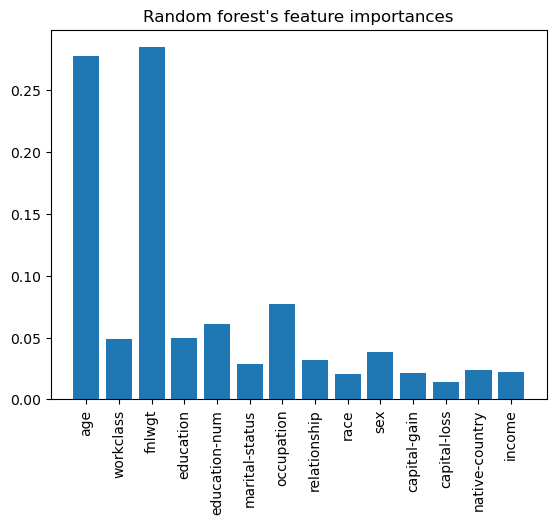

In [11]:
x_labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','native-country','income']
regressorImportance = regressorModel.feature_importances_
#for i,v in enumerate(regressorImportance):
#    print('Feature: %0d, Score: %.2f' % (i,v))

for i,v in enumerate(regressorImportance):
    print('Feature: %s, Score: %.2f' % (x_labels[i],v))
    
# plot
plt.bar(range(len(regressorModel.feature_importances_)), regressorModel.feature_importances_)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
x_labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','native-country','income']
plt.title('Random forest\'s feature importances')
plt.xticks(x,x_labels,rotation ='vertical')
plt.show()

In [12]:
#from sklearn.inspection import permutation_importance
#results = permutation_importance(regressorModel, x_train,y_train, n_repeats=30, random_state=0)
#importance = results.importances_mean
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.2f' % (i,v))
    
# plot
#plt.bar(range(len(importance)), importance)
#x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#x_labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','native-country','income']
#plt.xticks(x,x_labels,rotation ='vertical')
#plt.show()

In [13]:
#刪除特徵
x_train_del = x_train.drop(['age','fnlwgt'], axis=1) 
x_test_del = x_test.drop(['age','fnlwgt'], axis=1) 
x_train_del

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income
0,7,9,13,4,1,1,4,1,2174,0,39,0
1,6,9,13,2,4,0,4,1,0,0,39,0
2,4,11,9,0,6,1,4,1,0,0,39,0
3,4,1,7,2,6,0,2,1,0,0,39,0
4,4,9,13,2,10,5,2,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,12,2,13,5,4,0,0,0,39,0
32557,4,11,9,2,7,0,4,1,0,0,39,1
32558,4,11,9,6,1,4,4,0,0,0,39,0
32559,4,11,9,4,1,3,4,1,0,0,39,0


In [14]:
#Random forest
# 建立RandomForestRegressor模型
#n_estimators樹木的數量
regressorModel2 = RandomForestRegressor(n_estimators=150,random_state =0)

regressorModel2.fit(x_train_del, y_train)
# 使用訓練資料預測
Delpredicted=regressorModel2.predict(x_train_del)

# 預測成功的比例
print('訓練集: ',regressorModel2.score(x_train_del,y_train))
print('測試集: ',regressorModel2.score(x_test_del,y_test))
#from sklearn import metrics
#mse = metrics.mean_squared_error(y_train, predicted)
#print('MSE score: ', mse)

訓練集:  0.5030860707418434
測試集:  0.12291281568095713


In [15]:
MSE = metrics.mean_squared_error(y_train, Delpredicted)
RMSE = metrics.mean_squared_error(y_train, Delpredicted)**0.5
MAE = metrics.mean_absolute_error(y_train, Delpredicted)
MAPE = metrics.mean_absolute_percentage_error(y_train, Delpredicted)

print("RMSE:%.2f" %RMSE)
print("MAE:%.2f" %MAE)
print("MAPE:%.2f" %MAPE,"%")

RMSE:8.70
MAE:5.77
MAPE:0.23 %
